## Fifa 20 Attributes and Players Analysis

#### Importing Necessary libraries for Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 150)


In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [3]:
fifa_original = pd.read_csv(r'players_20.csv')
fifa_original.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,7/1/2004,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,91,91,91,95,95,95,95,95,95,95,95,94,89,89,89,94,70,68,68,68,70,65,54,54,54,65
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,7/10/2018,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,8/3/2017,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,87,87,87,93,92,92,92,93,93,93,93,92,85,85,85,92,69,64,64,64,69,64,49,49,49,64
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1/7/1993,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,7/16/2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1/7/1991,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,7/1/2019,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,86,86

In [4]:
fifa_original.set_index('short_name', inplace = True)

In [5]:
position_attributes = fifa_original.loc[:, 'ls':].dropna()
position_attributes.columns  = [i.upper() for i in position_attributes.columns]
position_attributes.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,
L. Messi,91,91,91,95,95,95,95,95,95,95,95,94,89,89,89,94,70,68,68,68,70,65,54,54,54,65
Cristiano Ronaldo,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64
Neymar Jr,87,87,87,93,92,92,92,93,93,93,93,92,85,85,85,92,69,64,64,64,69,64,49,49,49,64
J. Oblak,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
E. Hazard,86,86,86,92,91,91,91,92,92,92,92,92,86,86,86,92,69,66,66,66,69,64,52,52,52,64


## Relation between different attributes (Position-wise)

### 1. GK Attributes

##### Setting GK Attributes

In [58]:
gk_attributes = fifa_original[['overall', 'potential', 'gk_diving', 'gk_handling', 'gk_speed', 'gk_reflexes', 'gk_kicking', 'gk_positioning', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
gk_attributes = gk_attributes.dropna()

gk_attributes.head()

,overall,potential,gk_diving,gk_handling,gk_speed,gk_reflexes,gk_kicking,gk_positioning,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
short_name,,,,,,,,,,,,,
J. Oblak,91,93,87.0,92.0,52.0,89.0,78.0,90.0,87,92,78,90,89
M. ter Stegen,90,93,88.0,85.0,45.0,90.0,88.0,88.0,88,85,88,88,90
Alisson,89,91,85.0,84.0,51.0,89.0,85.0,90.0,85,84,85,90,89
De Gea,89,90,90.0,84.0,58.0,92.0,81.0,85.0,90,84,81,85,92
Ederson,88,91,86.0,82.0,63.0,88.0,93.0,86.0,86,82,93,86,88


In [59]:
gk_attributes.corr()

,overall,potential,gk_diving,gk_handling,gk_speed,gk_reflexes,gk_kicking,gk_positioning,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
overall,1.000000,0.702960,0.948912,0.925025,0.480652,0.947823,0.790903,0.944758,0.948912,0.925025,0.790903,0.944758,0.947823
potential,0.702960,1.000000,0.702637,0.667461,0.238038,0.704252,0.557182,0.622746,0.702637,0.667461,0.557182,0.622746,0.704252
gk_diving,0.948912,0.702637,1.000000,0.840950,0.459595,0.916992,0.731431,0.854291,1.000000,0.840950,0.731431,0.854291,0.916992
gk_handling,0.925025,0.667461,0.840950,1.000000,0.397455,0.829646,0.736218,0.876197,0.840950,1.000000,0.736218,0.876197,0.829646
gk_speed,0.480652,0.238038,0.459595,0.397455,1.000000,0.460778,0.381067,0.443027,0.459595,0.397455,0.381067,0.443027,0.460778
gk_reflexes,0.947823,0.704252,0.916992,0.829646,0.460778,1.000000,0.725041,0.855807,0.916992,0.829646,0.725041,0.855807,1.000000
gk_kicking,0.790903,0.557182,0.731431,0.736218,0.381067,0.725041,1.000000,0.736911,0.731431,0.736218,1.000000,0.736911,0.725041
gk_positioning,0.944758,0.622746,0.854291,0.876197,0.443027,0.855807,0.736911,1.000000,0.854291,0.876197,0.736911,1.000000,0.855807
goalkeeping_diving,0.948912,0.702637,1.000000,0.840950,0.459595,0.916992,0.731431,0.854291,1.000000,0.840950,0.731431,0.854291,0.916992
goalkeeping_handling,0.925025,0.667461,0.840950,1.000000,0.397455,0.829646,0.736218,0.876197,0.840950,1.000000,0.736218,0.876197,0.829646


Text(0.5, 1, 'GK Attributes')

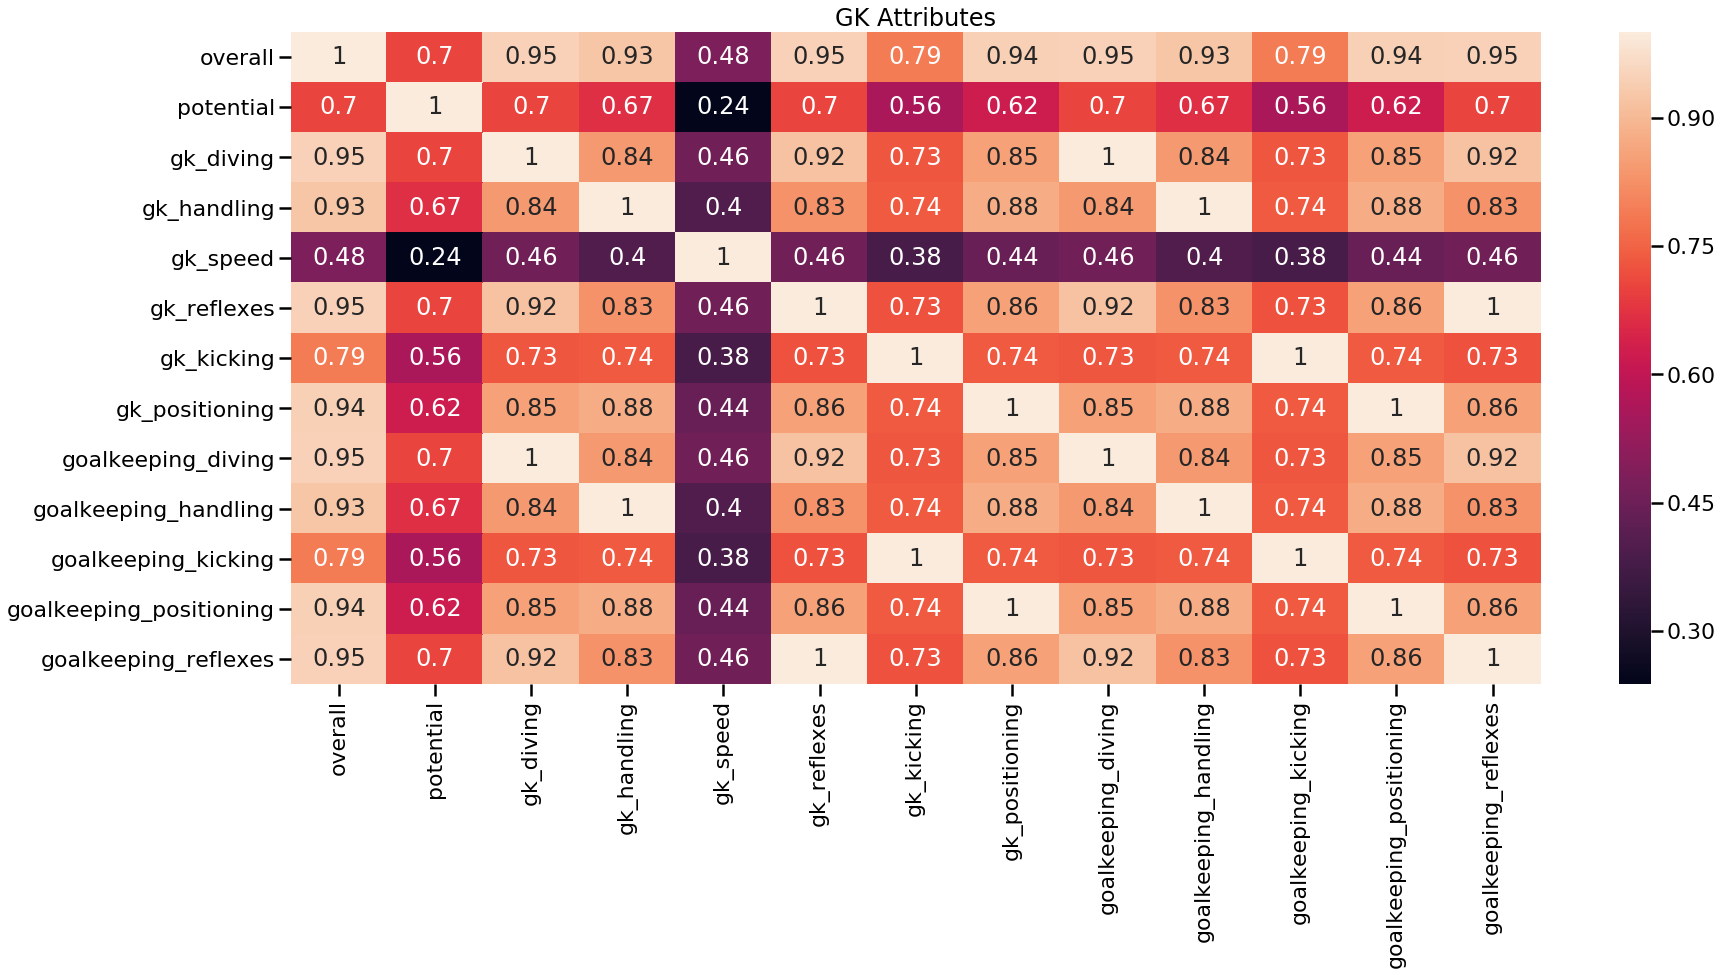

In [60]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(gk_attributes.corr(), annot = True).set_title('GK Attributes')

Here we can see how different goal-keeping attributes may be related to each other and how they may contribute to the overall attributes of a GK.
For example, correlation between GK Handling and Overall attributes is 0.93 and that of Speed and Overall attributes is 0.48.
Thus, we can infer from this data that speed is not that of an important factor when it comes to judging the quality of a GK but handling is. 
NOTE : Correlation doesn't always imply causation i.e it is not always necessary that two attributes who have a correlation close to 1 are always related to each other nor that they are not related to each other if correlation is close to 0. There may be other factors involved for two properties to affect each other.

### 2. Defense Attributes

##### Setting Defender Attributes

In [61]:
defense_pos = np.array(['CB','LB','RB'])

defenders = fifa_original[fifa_original['player_positions'].isin(i for i in defense_pos)]

defense_attributes = defenders[['overall', 'potential', 'defending', 'physic', 'pace', 'passing', 'dribbling', 'attacking_heading_accuracy', 'attacking_short_passing', 'skill_long_passing', 'skill_ball_control', 'movement_sprint_speed', 'movement_acceleration', 'movement_reactions', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',]]
defense_attributes= defense_attributes.dropna()
defense_attributes.corr()  

,overall,potential,defending,physic,pace,passing,dribbling,attacking_heading_accuracy,attacking_short_passing,skill_long_passing,skill_ball_control,movement_sprint_speed,movement_acceleration,movement_reactions,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,defending_marking,defending_standing_tackle,defending_sliding_tackle
overall,1.000000,0.659602,0.959612,0.688754,0.049763,0.652317,0.515420,0.733631,0.768890,0.713436,0.691307,0.083749,0.003379,0.871238,0.581984,0.272914,0.357112,0.470525,0.458086,0.902934,0.914816,0.896004
potential,0.659602,1.000000,0.641363,0.314913,0.191445,0.384873,0.368360,0.462891,0.503129,0.418548,0.462840,0.213017,0.151198,0.558657,0.316580,0.200953,0.186326,0.175916,0.203873,0.578398,0.647085,0.626614
defending,0.959612,0.641363,1.000000,0.646241,-0.090535,0.519324,0.372791,0.797063,0.665929,0.627948,0.562189,-0.054579,-0.130235,0.825746,0.512031,0.257820,0.228143,0.491754,0.354181,0.949006,0.951966,0.906093
physic,0.688754,0.314913,0.646241,1.000000,-0.179163,0.269424,0.093363,0.683086,0.410614,0.437509,0.291161,-0.128932,-0.229780,0.510930,0.408423,0.290509,0.417366,0.871491,0.217956,0.606831,0.581511,0.519818
pace,0.049763,0.191445,-0.090535,-0.179163,1.000000,0.393591,0.586446,-0.358769,0.213881,0.144189,0.376338,0.975029,0.963003,0.104924,0.095201,0.135910,0.475595,-0.443418,0.274761,-0.088623,-0.036207,0.063708
passing,0.652317,0.384873,0.519324,0.269424,0.393591,1.000000,0.852563,0.212958,0.874739,0.832357,0.858134,0.387158,0.374483,0.652480,0.619264,0.085305,0.483154,-0.027035,0.732417,0.503122,0.497196,0.553158
dribbling,0.515420,0.368360,0.372791,0.093363,0.586446,0.852563,1.000000,0.008693,0.693173,0.613884,0.882312,0.563337,0.575538,0.565080,0.457143,0.092426,0.501232,-0.230668,0.635299,0.360322,0.382315,0.463413
attacking_heading_accuracy,0.733631,0.462891,0.797063,0.683086,-0.358769,0.212958,0.008693,1.000000,0.430666,0.446388,0.257501,-0.307007,-0.400340,0.562660,0.374120,0.232266,0.029089,0.672912,0.138653,0.711075,0.713451,0.628723
attacking_short_passing,0.768890,0.503129,0.665929,0.410614,0.213881,0.874739,0.693173,0.430666,1.000000,0.836136,0.821403,0.222273,0.188492,0.700457,0.549477,0.142882,0.387842,0.174445,0.552154,0.637420,0.629055,0.637681
skill_long_passing,0.713436,0.418548,0.627948,0.437509,0.144189,0.832357,0.613884,0.446388,0.836136,1.000000,0.717119,0.157789,0.116481,0.642661,0.594095,0.148135,0.346885,0.225365,0.580036,0.602378,0.575137,0.589755


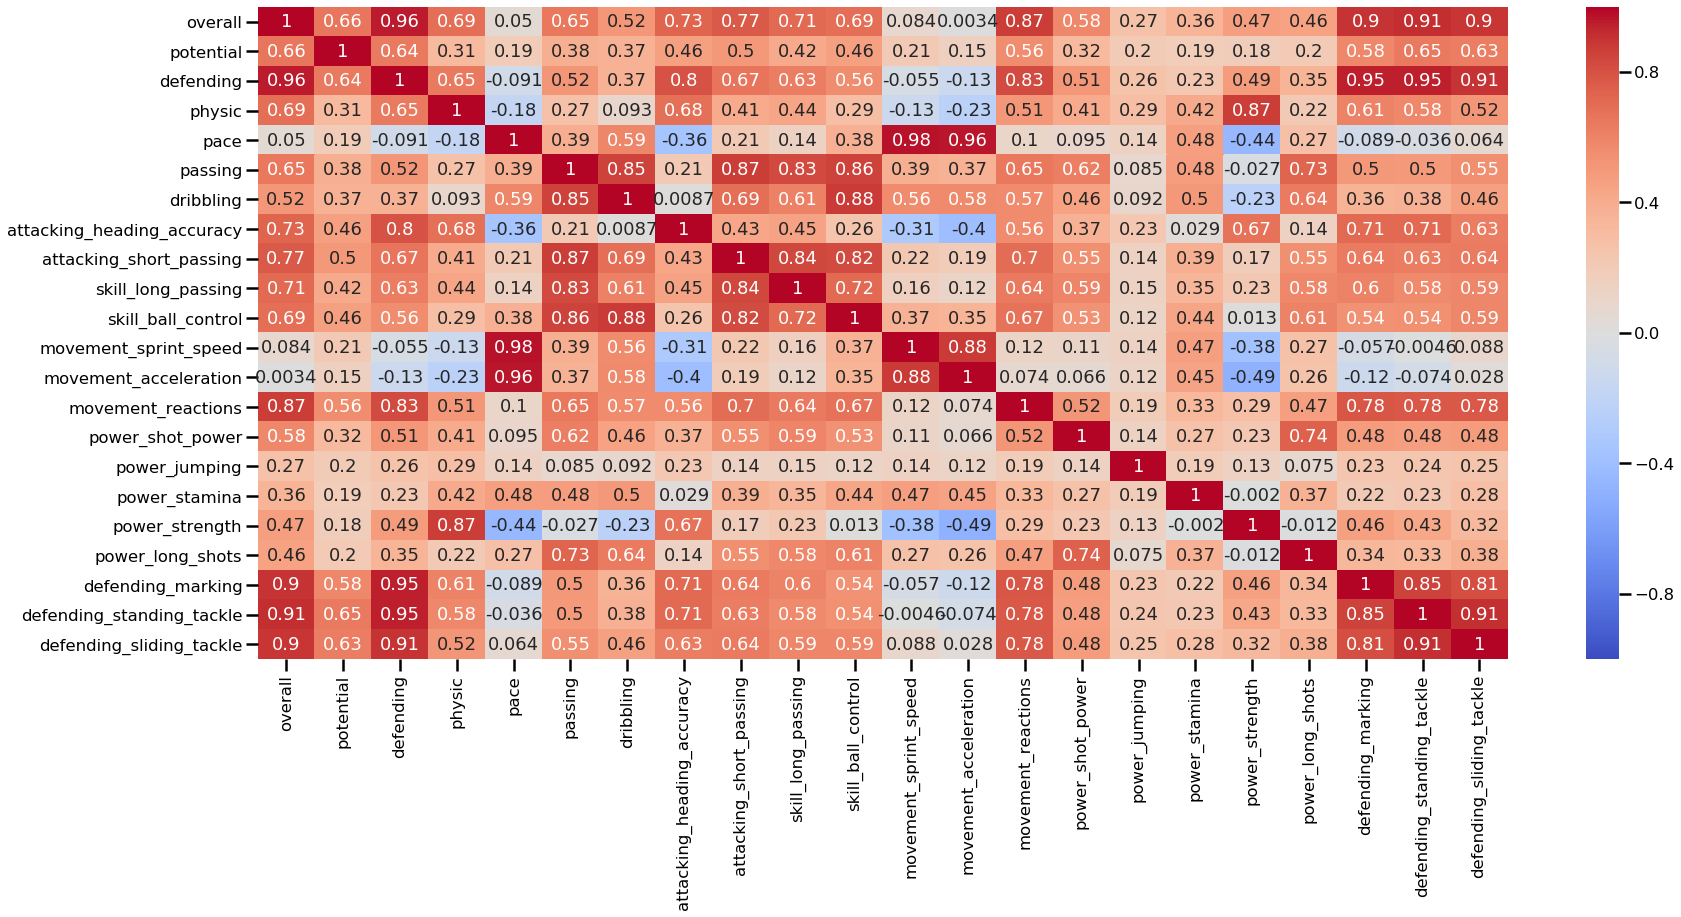

In [62]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=.75)
sns.heatmap(defense_attributes.corr(), annot = True, vmin = -1, vmax = 1, cmap= 'coolwarm')


Here we can see how different defense attributes may be related to each other and how they may contribute to the overall attributes of a Defender.
NOTE : It is not always necessary that 2 attributes who have a correlation close to 1 are always related to each other. There may be other factors involved for two properties to affect each other.




# 3. ADD ATTACKING PLOTLY HEATMAP HERE 

##### Setting Attacker/Midfielder Attributes

In [75]:
# attacking attributes
attack_pos = np.array(['LS','RS','ST','CF','CAM','RM','LM','RW','LW','LAM','RAM'])
attackers = fifa_original[fifa_original['player_positions'].isin(i for i in attack_pos)]
attack = attackers[['overall', 'potential', 'skill_moves', 'pace','shooting', 'passing', 'dribbling', 'physic',
                   'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                   'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                   'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                   'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
                   'power_strength', 'power_long_shots']]
attack = attack.dropna()

In [76]:
# attacking corr
attack_corr = attack.corr()
attack_corr

,overall,potential,skill_moves,pace,shooting,passing,dribbling,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
overall,1.000000,0.597841,0.594002,0.191792,0.887449,0.696770,0.821848,0.606518,0.486510,0.814951,0.581121,0.769876,0.800648,0.785909,0.619736,0.527377,0.454431,0.897757,0.163685,0.204017,0.248661,0.875986,-0.031531,0.822796,0.357167,0.522130,0.464731,0.789854
potential,0.597841,1.000000,0.451887,0.272820,0.487497,0.417552,0.596948,0.153716,0.283146,0.475417,0.231637,0.480312,0.410076,0.584805,0.375345,0.251876,0.268615,0.597037,0.266399,0.262537,0.244645,0.483238,0.103090,0.424051,0.130973,0.209844,0.076300,0.417158
skill_moves,0.594002,0.451887,1.000000,0.332846,0.426843,0.617634,0.719437,0.134758,0.529048,0.349073,0.068816,0.577348,0.428586,0.706400,0.563385,0.488833,0.468457,0.656664,0.331754,0.313008,0.417583,0.478252,0.232468,0.415957,0.081621,0.259647,0.011546,0.449497
pace,0.191792,0.272820,0.332846,1.000000,-0.001537,0.235704,0.445239,-0.105749,0.334342,-0.017125,-0.289619,0.152111,-0.009071,0.406066,0.207684,0.114687,0.183843,0.215542,0.962165,0.971808,0.703188,0.064180,0.507822,0.011852,0.061132,0.309665,-0.259414,0.042154
shooting,0.887449,0.487497,0.426843,-0.001537,1.000000,0.455993,0.609468,0.649636,0.257244,0.957830,0.728683,0.547969,0.837844,0.586085,0.493721,0.413895,0.213164,0.728675,-0.024522,0.016757,0.057698,0.804961,-0.192140,0.886127,0.412719,0.445365,0.570201,0.879989
passing,0.696770,0.417552,0.617634,0.235704,0.455993,1.000000,0.790662,0.166645,0.866953,0.319524,0.047634,0.913513,0.504664,0.759194,0.770317,0.739952,0.868797,0.764646,0.242898,0.216548,0.390224,0.573257,0.284132,0.482024,0.029231,0.302559,0.003642,0.530661
dribbling,0.821848,0.596948,0.719437,0.445239,0.609468,0.790662,1.000000,0.219508,0.666969,0.520094,0.156906,0.771333,0.593693,0.971776,0.690777,0.584596,0.587957,0.913475,0.443201,0.420767,0.584898,0.668837,0.354309,0.582141,0.173790,0.392290,0.044219,0.608412
physic,0.606518,0.153716,0.134758,-0.105749,0.649636,0.166645,0.219508,1.000000,-0.000227,0.620291,0.722262,0.285328,0.556881,0.210188,0.170637,0.137052,0.036778,0.389089,-0.165492,-0.049756,-0.170306,0.574430,-0.450017,0.631890,0.489225,0.621573,0.919747,0.509565
attacking_crossing,0.486510,0.283146,0.529048,0.334342,0.257244,0.866953,0.666969,-0.000227,1.000000,0.136824,-0.152931,0.670336,0.325056,0.643153,0.651413,0.623480,0.715082,0.585656,0.345303,0.306572,0.432739,0.358437,0.369607,0.318367,-0.083396,0.215778,-0.146282,0.340375
attacking_finishing,0.814951,0.475417,0.349073,-0.017125,0.957830,0.319524,0.520094,0.620291,0.136824,1.000000,0.740259,0.433741,0.752387,0.498641,0.365311,0.279827,0.087696,0.642361,-0.038976,0.001169,0.018787,0.741365,-0.223539,0.769662,0.416103,0.419063,0.565732,0.760250


In [77]:
# plot attacking correlation
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=attack_corr,
                   x=attack_corr.columns,
                   y=attack_corr.columns, colorscale='Blues',
                   hoverongaps = True))
fig.show()

Here we can see how different attacking/mid-fielding attributes may be related to each other and how they may contribute to the overall attributes of an attacker/mid-fielder.
NOTE : It is not always necessary that 2 attributes who have a correlation close to 1 are always related to each other. There may be other factors involved for two properties to affect each other.

##### Resetting Column Names

In [47]:
fifa_original = fifa_original[['long_name', 'age', 'club', 'nationality', 'overall', 'potential', 'value_eur',
             'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type',
             'release_clause_eur', 'team_position', 'team_jersey_number', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
             'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
             'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
             'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
             'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
             'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_handling']]

fifa_original.columns = ['Full Name', 'Age', 'Club', 'Nationality', 'Overall', 'Potential', 'Value(Euro)', 'Wage(Euro)', 'Position(s)',
                'Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Release Clause', 'Team Pos', 'Jersey No.', 'National Pos', 'National Jersey No.',
                'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physic'] + [str(i) for i in fifa_original.columns[26:]] 
fifa_original.head()

,Full Name,Age,Club,Nationality,Overall,Potential,Value(Euro),Wage(Euro),Position(s),Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Release Clause,Team Pos,Jersey No.,National Pos,National Jersey No.,Pace,Shooting,Passing,Dribbling,Defending,Physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_handling
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
L. Messi,Lionel Andrés Messi Cuccittini,32,FC Barcelona,Argentina,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,10.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,11
Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,Juventus,Portugal,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,7.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,11
Neymar Jr,Neymar da Silva Santos Junior,27,Paris Saint-Germain,Brazil,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,CAM,10.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9
J. Oblak,Jan Oblak,26,Atlético Madrid,Slovenia,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,13.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,92
E. Hazard,Eden Hazard,28,Real Madrid,Belgium,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,7.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,12


In [48]:
fifa_original['Club'].fillna('No Club', inplace = True)
fifa_original['Position(s)'].fillna('unknown', inplace = True)
fifa_original['Work Rate'].fillna('Medium/ Medium', inplace = True)
fifa_original['Foot'].fillna('Right', inplace = True)

fifa_original.head()

,Full Name,Age,Club,Nationality,Overall,Potential,Value(Euro),Wage(Euro),Position(s),Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Release Clause,Team Pos,Jersey No.,National Pos,National Jersey No.,Pace,Shooting,Passing,Dribbling,Defending,Physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_handling
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
L. Messi,Lionel Andrés Messi Cuccittini,32,FC Barcelona,Argentina,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,10.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,11
Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,Juventus,Portugal,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,7.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,11
Neymar Jr,Neymar da Silva Santos Junior,27,Paris Saint-Germain,Brazil,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,CAM,10.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9
J. Oblak,Jan Oblak,26,Atlético Madrid,Slovenia,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,13.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,92
E. Hazard,Eden Hazard,28,Real Madrid,Belgium,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,7.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,12


## Player and Club Stats

### 1. Scatter Plot of all Players in Fifa-20 

In [49]:
fig = go.Figure()

fig = go.Figure(data=go.Scatter(
    x = fifa_original['Overall'],
    y = fifa_original['Value(Euro)'],
    mode='markers',
    marker=dict(
        size=16,
        color=fifa_original['Age'], #set color equal to a variable
        colorscale='Plasma', # one of plotly colorscales
        showscale=True
    ),
    text= fifa_original.index,
))

fig.update_layout(title='Styled Scatter Plot (colored by Age) year 2020 - Overall Rating vs Value in Euros',
                  xaxis_title='Overall Rating',
                  yaxis_title='Value in Euros',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

### 2. Top 20 Clubs by Total Player Value (Euro)

In [15]:
TopClubsInVal = fifa_original[['Club', 'Value(Euro)']]
TopClubsInVal = TopClubsInVal.set_index(n for n in range(TopClubsInVal.shape[0]))
TopClubsInVal = pd.DataFrame(TopClubsInVal.groupby('Club')['Value(Euro)'].sum()).sort_values('Value(Euro)', ascending = False).head(20)

fig = go.Figure(
        data = [go.Bar(y = TopClubsInVal['Value(Euro)'],
                       x = TopClubsInVal.index)],
        layout_title_text = "Top 20 Clubs by Total Player Value(Euro) of Fifa 20"
        
)
fig.update_traces(marker_color='green')
fig.show() 

### 3. Top 30 Most Valued Players (Euro)

In [16]:
most_valued = fifa_original[['Value(Euro)', 'Club', 'Nationality']]
most_valued = most_valued.sort_values('Value(Euro)', ascending = False).head(30)

fig = go.Figure(
        data = [go.Bar(y = most_valued['Value(Euro)'],
                       x = most_valued.index)],
                       
        
        layout_title_text = 'Highest Valued Players of Fifa 20'
)

fig.show()

### 4. Top 30 Highest Rated Players

In [17]:
top_ratings = fifa_original[['Club', 'Overall', 'Potential', 'Value(Euro)']]
top_ratings = top_ratings.sort_values('Overall', ascending = False).head(30)

fig = go.Figure(
        data = [go.Bar(y = top_ratings['Overall'],
                       x = top_ratings.index)],
        layout_title_text = 'Top Rated Players of Fifa 20'
)
fig.update_traces(marker_color='#00A')
fig.show()

### 4. Top 20 GK's

In [18]:
GK = fifa_original[fifa_original['Position(s)'] == 'GK']
GK = GK[['Club', 'Nationality', 'Overall', 'Potential']]

In [19]:
GK = GK.sort_values('Overall', ascending = False).head(20)

fig = go.Figure(
        data = [go.Bar(y = GK['Overall'],
                       x = GK.index)],
        layout_title_text = "Top Rated GK's of Fifa 20"
)
fig.update_traces(marker_color='goldenrod')
fig.show()

### 5. Number of Left/Right Footed Players

Text(0.5, 1.0, 'Left v/s Right')

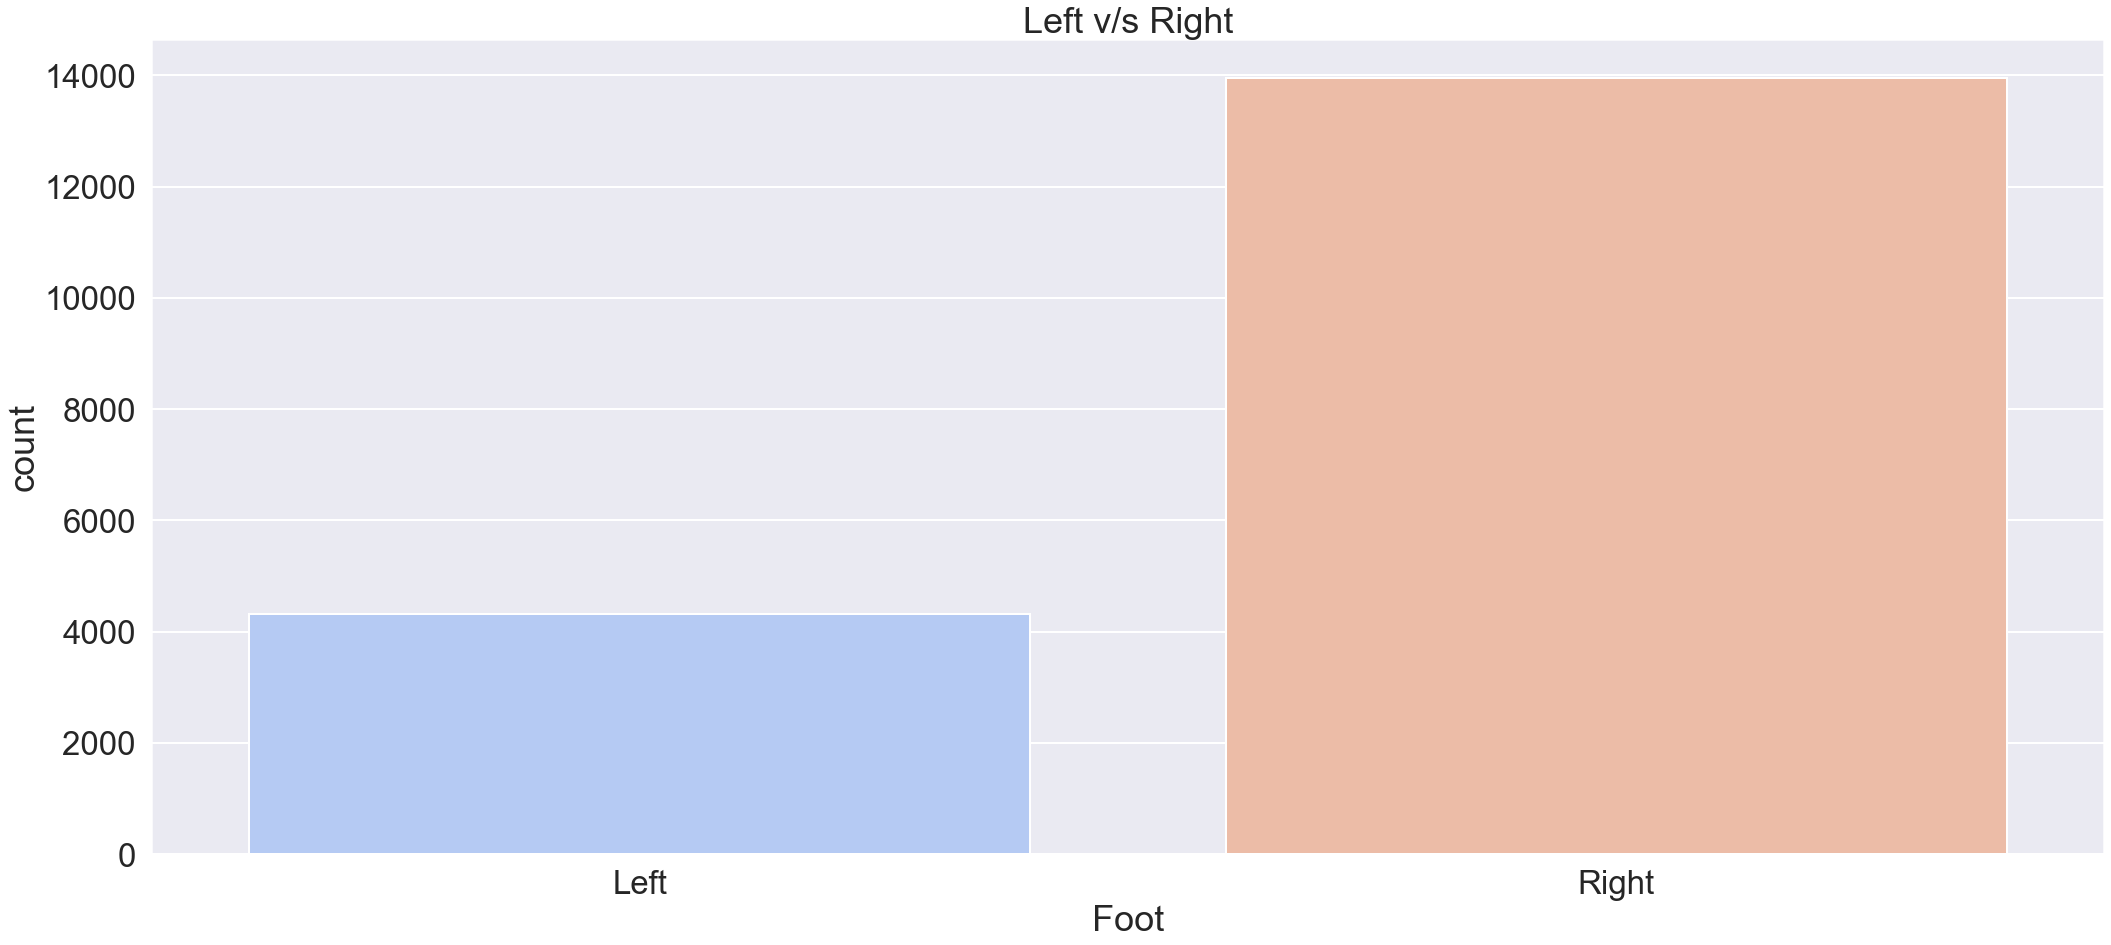

In [20]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (35,15))
sns.set_context('poster',font_scale=1.5)
sns.countplot(x = 'Foot', data = fifa_original, palette = 'coolwarm').set_title('Left v/s Right')

### 6. Best Free-kick takers

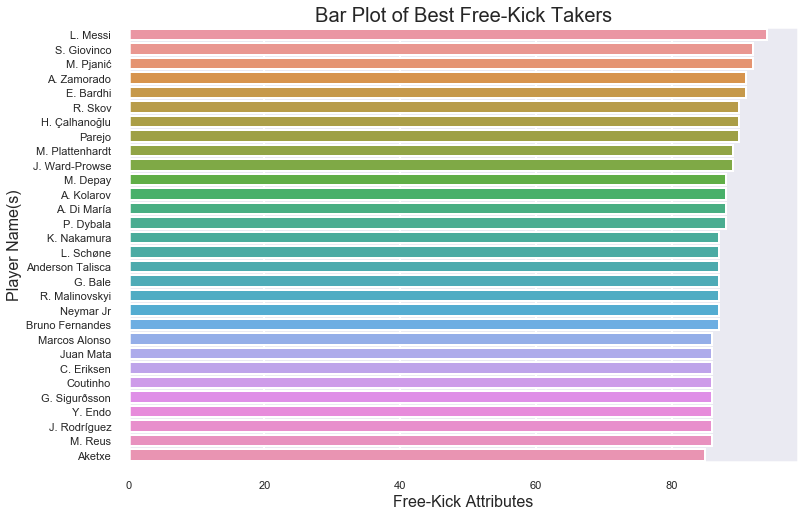

In [21]:
best_fk = fifa_original[['skill_fk_accuracy']].sort_values('skill_fk_accuracy', ascending = False).head(30)

x = best_fk.skill_fk_accuracy
plt.figure(figsize=(12,8))
plt.style.use('seaborn-paper')
sns.set_context('poster',font_scale=.5)

ax = sns.barplot(x = x, y = best_fk.index, data = best_fk)
ax.set_xlabel(xlabel = "Free-Kick Attributes", fontsize = 16)
ax.set_ylabel(ylabel = 'Player Name(s)', fontsize = 16)
ax.set_title(label = "Bar Plot of Best Free-Kick Takers", fontsize = 20)
plt.show()



### 7. Count of Promising Young Players from All Clubs and Top Clubs

In [22]:
top_clubs = np.array(['Real Madrid', 'Manchester City', 'Tottenham Hotspur', 'Napoli',
             'FC Barcelona', 'Juventus', 'Paris Saint-Germain', 'Liverpool',
             'Manchester United', 'Chelsea', 'Atlético Madrid', 'Arsenal',
             'Borussia Dortmund', 'FC Bayern MÃ¼nchen', 'West Ham United', 'FC Schalke 04',
             'Roma', 'Leicester City', 'Inter', 'Milan'])

In [23]:
top_clubs.shape

(20,)

In [24]:
condition_top20 = ((fifa_original['Potential'] - fifa_original['Overall']) >= 15) & (fifa_original['Potential'] >= 80) & (fifa_original['Club'].isin(top_clubs))  & (fifa_original['Age'] <= 20) 
young_players_top20 = fifa_original[condition_top20].sort_values('Potential', ascending = False)

young_clubs_top20 = young_players_top20.Club
young_clubs_top20 = pd.DataFrame(young_clubs_top20.value_counts())
young_players_top20.shape

(59, 56)

#### There are 59 Players under 20 in the Top 20 Clubs who have high room of improvement and the potential to become some of Top players in the World. 

In [25]:
condition_all = ((fifa_original['Potential'] - fifa_original['Overall']) >= 15) & (fifa_original['Potential'] >= 80)   & (fifa_original['Age'] <= 20) 
young_players_all = fifa_original[condition_all].sort_values('Potential', ascending = False)

young_clubs_all = young_players_all.Club
young_clubs_all = pd.DataFrame(young_clubs_all.value_counts())
young_players_all.shape

(321, 56)

#### There are 321 Players under 20 from all Clubs who have high room of improvement and the potential to become some of the Top players in the World.

In [26]:
young_players_top20.head()

,Full Name,Age,Club,Nationality,Overall,Potential,Value(Euro),Wage(Euro),Position(s),Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Release Clause,Team Pos,Jersey No.,National Pos,National Jersey No.,Pace,Shooting,Passing,Dribbling,Defending,Physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_handling
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Riqui Puig,Ricard Puig Martí,19,FC Barcelona,Spain,71,87,5000000,39000,CM,Right,1,3,3,High/Medium,Lean,13400000.0,SUB,28.0,NaN,NaN,65.0,57.0,73.0,76.0,54.0,46.0,60,58,49,79,56,75,66,51,76,77,68,63,82,70,83,60,55,50,39,54,54,55,55,78,55,75,53,57,53,15
T. Kubo,久保 建英,18,Real Madrid,Japan,70,87,3700000,21000,"RM, CF",Left,1,4,4,High/Medium,Lean,9800000.0,RES,26.0,NaN,NaN,82.0,60.0,62.0,78.0,39.0,52.0,55,64,39,67,57,79,68,72,54,78,89,77,83,61,83,61,54,72,45,52,43,29,62,60,61,64,40,43,48,7
M. Greenwood,Mason Greenwood,17,Manchester United,England,67,87,1500000,6000,"CF, RM, ST",Left,1,5,3,Medium/Medium,Lean,4400000.0,SUB,26.0,NaN,NaN,76.0,66.0,61.0,68.0,36.0,59.0,54,67,62,64,61,68,64,65,61,66,76,76,73,65,64,67,63,65,62,65,44,34,68,62,58,68,30,36,30,6
A. Gomes,Angel Gomes,18,Manchester United,England,68,86,1800000,12000,"CAM, CM, LW",Right,1,4,4,Medium/Medium,Lean,4700000.0,RES,28.0,NaN,NaN,73.0,62.0,66.0,71.0,39.0,42.0,61,61,51,67,57,68,65,68,65,68,77,70,88,64,90,60,54,57,32,64,47,37,62,68,66,69,36,41,35,15
J. Todibo,Jean-Clair Todibo,19,FC Barcelona,France,71,86,4800000,33000,"CB, CDM",Right,1,2,2,Medium/Medium,Normal,12700000.0,SUB,6.0,NaN,NaN,69.0,43.0,58.0,63.0,67.0,76.0,46,40,67,70,35,62,47,41,64,70,67,70,54,66,55,52,76,64,83,41,72,68,41,50,46,72,62,70,68,13


In [27]:
young_players_all.head()

,Full Name,Age,Club,Nationality,Overall,Potential,Value(Euro),Wage(Euro),Position(s),Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Release Clause,Team Pos,Jersey No.,National Pos,National Jersey No.,Pace,Shooting,Passing,Dribbling,Defending,Physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_handling
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D. Szoboszlai,Dominik Szoboszlai,18,FC Red Bull Salzburg,Hungary,74,89,11500000,11000,"CAM, RM, CM",Right,1,4,4,Medium/Low,Lean,24400000.0,LM,14.0,CAM,10.0,80.0,69.0,71.0,78.0,37.0,65.0,65,67,58,72,69,79,78,77,72,80,76,83,77,68,71,72,72,69,69,74,49,32,62,72,69,75,35,38,26,10
P. De la Vega,Pedro De la Vega,18,Club Atlético Lanús,Argentina,70,88,3700000,5000,RW,Right,1,3,3,High/Medium,Normal,7800000.0,RES,39.0,NaN,NaN,86.0,62.0,60.0,76.0,30.0,59.0,63,60,45,65,55,77,57,42,53,72,85,87,86,59,78,73,82,68,60,58,39,22,66,58,47,68,28,30,33,9
T. Almada,Thiago Almada,18,Vélez Sarsfield,Argentina,72,88,6500000,4000,"CAM, LW, ST",Right,1,3,3,Medium/Low,Lean,13800000.0,SUB,23.0,NaN,NaN,86.0,70.0,66.0,76.0,37.0,55.0,59,71,39,69,59,76,74,64,63,73,87,85,88,59,89,72,55,65,48,70,59,41,67,67,61,68,33,38,36,8
W. Saliba,William Saliba,18,AS Saint-Étienne,France,71,88,4600000,5000,CB,Right,1,3,2,High/Medium,Lean,NaN,RCB,4.0,NaN,NaN,63.0,29.0,57.0,55.0,71.0,72.0,41,22,67,70,32,53,45,35,52,58,62,64,49,68,60,49,74,68,76,20,65,76,35,61,47,65,70,72,69,10
M. Greenwood,Mason Greenwood,17,Manchester United,England,67,87,1500000,6000,"CF, RM, ST",Left,1,5,3,Medium/Medium,Lean,4400000.0,SUB,26.0,NaN,NaN,76.0,66.0,61.0,68.0,36.0,59.0,54,67,62,64,61,68,64,65,61,66,76,76,73,65,64,67,63,65,62,65,44,34,68,62,58,68,30,36,30,6


In [28]:
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['From Top 20 Clubs', 'From All Clubs'])
fig.add_trace(go.Pie(labels=young_clubs_top20.index, values= young_clubs_top20.Club, scalegroup='one',
                     name="From Top 20 Clubs"), 1, 1)
fig.add_trace(go.Pie(labels=young_clubs_all.head(20).index, values=young_clubs_all.head(20).Club, scalegroup='one',
                     name="From All Clubs"), 1, 2)

fig.update_layout(title_text='Count of Promising Young Players')
fig.show()

### 8. Promising Young Players by Value

In [40]:
young_players_all_cheapest = young_players_all[['Age', 'Club', 'Nationality', 'Overall', 'Potential', 'Value(Euro)', 'Wage(Euro)', 'Position(s)']].sort_values('Value(Euro)', ascending = True) 

fig = go.Figure()

fig = go.Figure(data=go.Scatter(
    x = young_players_all_cheapest['Potential'],
    y = young_players_all_cheapest['Value(Euro)'],
    mode='markers',
    marker=dict(
        size=16,
        color=young_players_all_cheapest['Age'], #set color equal to a variable
        colorscale='Plasma', # one of plotly colorscales
        showscale=True
    ),
    text= young_players_all_cheapest.index,
))

fig.update_layout(title='Scatter Plot of Potential of Promising Young Players vs Value in Euros',
                  xaxis_title='Potential',
                  yaxis_title='Value in Euros',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

In [42]:
young_players_all_cheapest50 = young_players_all_cheapest.head(50)

fig = go.Figure()

fig = go.Figure(data=go.Scatter(
    x = young_players_all_cheapest50['Potential'],
    y = young_players_all_cheapest50['Value(Euro)'],
    mode='markers',
    marker=dict(
        size=16,
        color=young_players_all_cheapest50['Age'], #set color equal to a variable
        colorscale='Plasma', # one of plotly colorscales
        showscale=True
    ),
    text= young_players_all_cheapest50.index,
))

fig.update_layout(title='Scatter Plot of Potential of 50 Cheapest Promising Young Players vs Value in Euros',
                  xaxis_title='Potential',
                  yaxis_title='Value in Euros',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()